In [1]:
import torch
import torch.nn as nn

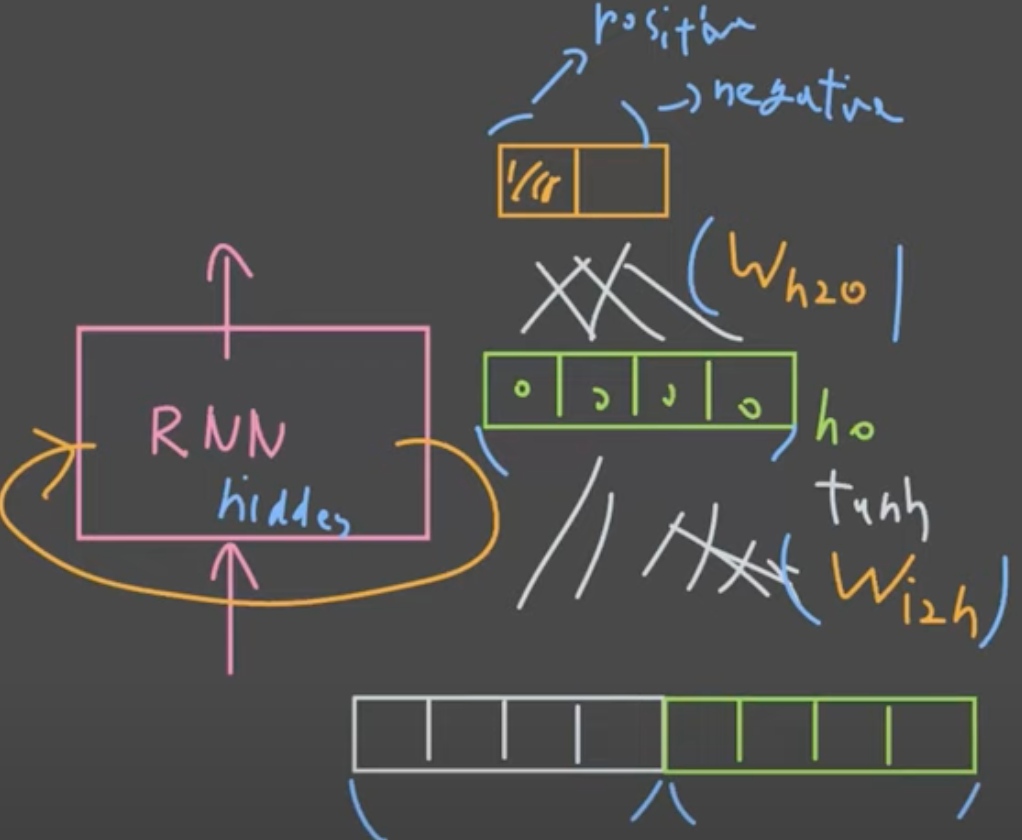

### RNN 모델 정의

In [5]:
from typing import Tuple


class MyRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()

        self.hidden_size = hidden_size
        # input to hidden size 정의(입력크기, 출력크기)
        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        # input to output size 정의
        self.i2o = nn.Linear(hidden_size, output_size)
        

    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1)
        #활성화 함수로 tanh 사용(하이퍼볼릭 탄젠트)
        hidden = torch.tanh(self.i2h(combined))
        output = self.i2o(hidden)

        return output, hidden
        

    def get_hidden(self):
        return torch.zeros(1, self.hidden_size)

#### RNN 모델 사용

In [6]:
rnn_model = MyRNN(input_size=4, hidden_size=4, output_size=2) # input_size, hidden_size, output_size(positive, negative)

In [7]:
#최초 hidden state
hidden = rnn_model.get_hidden()

In [13]:
# 각 단어를 임베딩으로 변환한다고 가정
# 실제로는 적절한 임베딩 방법을 사용해야 함
def word_to_tensor(word, input_size):
    # 예시: 간단한 원-핫 인코딩
    tensor = torch.zeros(1, input_size)
    # 여기서는 단순화를 위해 각 단어의 길이를 인덱스로 사용
    index = len(word) % input_size
    print(f"index: {index}")
    tensor[0][index] = 1
    return tensor

In [15]:
input_tensor0 = word_to_tensor("The", input_size=4)
print(input_tensor0)
input_tensor1 = word_to_tensor("food", input_size=4)
print(input_tensor1)
input_tensor2 = word_to_tensor("is", input_size=4)
print(input_tensor2)
input_tensor3 = word_to_tensor("good", input_size=4)
print(input_tensor3)

index: 3
tensor([[0., 0., 0., 1.]])
index: 0
tensor([[1., 0., 0., 0.]])
index: 2
tensor([[0., 0., 1., 0.]])
index: 0
tensor([[1., 0., 0., 0.]])


In [21]:
# The food is good
sentence = "The food is good"
words = sentence.split()

output_tensor0, hidden = rnn_model(input_tensor0, hidden) #The
output_tensor1, hidden = rnn_model(input_tensor1, hidden) #food
output_tensor2, hidden = rnn_model(input_tensor2, hidden) #is
output_tensor3, hidden = rnn_model(input_tensor3, hidden) #good


In [23]:
# 결과 출력
print("Output for 'The':", output_tensor0)
print("Output for 'food':", output_tensor1)
print("Output for 'is':", output_tensor2)
print("Output for 'good':", output_tensor3)

Output for 'The': tensor([[-0.1834,  0.3462]], grad_fn=<AddmmBackward0>)
Output for 'food': tensor([[-0.3131,  0.2351]], grad_fn=<AddmmBackward0>)
Output for 'is': tensor([[-0.1449,  0.3891]], grad_fn=<AddmmBackward0>)
Output for 'good': tensor([[-0.2917,  0.2332]], grad_fn=<AddmmBackward0>)
